In [1]:
import Generate as gen

In [2]:
import Reconstruct as reco

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
s = gen.Simulator()

    t  x  y
0  22  0  0

[1 rows x 3 columns]


In [6]:
orb = s.propagate(x=[20.,30.],v=[0.4,-0.6])

New planet
    t   x   y
0  22  20  30

[1 rows x 3 columns]


In [7]:
astr = reco.Tracking()

In [8]:
hits = orb['position'].values

KeyError: u'no item named position'

In [9]:
s.p.history

,t,x,y
0,22,20.000000,30.000000
1,0,20.402400,29.401600
2,1,20.807194,28.804810
3,2,21.214374,28.209638
4,3,21.623936,27.616096
5,4,22.035871,27.024192
6,5,22.450175,26.433935
7,6,22.866839,25.845336
8,7,23.285858,25.258403
9,8,23.707224,24.673147


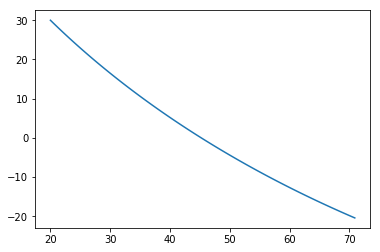

In [10]:
s.plot()

In [47]:
hits=pd.read_csv("test.csv")

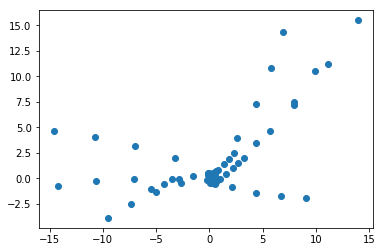

In [48]:
plt.scatter(hits['x'].values,hits['y'].values)
plt.show()

In [25]:
hits

,Unnamed: 0,t,x,y
0,0,0,0.000000,0.000000
1,1,22,0.343855,0.236546
2,2,22,-0.185713,-0.511757
3,3,22,0.463997,0.350118
4,4,22,-0.424147,-0.418858
5,5,22,-0.164392,0.404742
6,6,22,0.414178,-0.376526
7,7,22,-0.082244,-0.316921
8,8,22,-0.513863,-0.516207
9,9,22,-0.387055,0.430279


In [41]:
hits=hits.drop('Unnamed: 0', axis=1)
hits=hits.drop('t', axis=1)
hits.values

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.00629944e-01,   5.95590287e-01],
       [  1.17565105e-01,   5.60265446e-01],
       [  4.85567366e-01,  -1.31260778e-01],
       [  9.07723012e-01,  -7.91272283e-01],
       [  1.38134860e+00,  -1.41553651e+00],
       [  1.90343056e+00,  -2.00004826e+00],
       [  2.39021272e-01,   3.11075227e-01],
       [  3.38733503e-01,   2.49040327e-01],
       [  2.38294231e+00,  -9.06617809e-01],
       [  4.51330762e+00,  -1.89537659e+00],
       [  6.71622783e+00,  -2.71085694e+00],
       [  8.97763284e+00,  -3.34778631e+00],
       [  4.73407512e-01,   5.78680773e-02],
       [  4.34528752e-01,   3.46226021e-02],
       [ -3.22702010e-01,  -4.62435628e-01],
       [ -1.03790333e+00,  -1.01850664e+00],
       [ -1.70648620e+00,  -1.63005183e+00],
       [ -2.32415841e+00,  -2.29317653e+00],
       [ -4.66703498e-02,   3.84993678e-01],
       [ -5.82764201e-02,   3.08693952e-01],
       [ -2.26088360e-01,  -1.22542198e+00],
       [ -

In [32]:
import sklearn.neighbors as nb

In [42]:
A = nb.radius_neighbors_graph(hits.values, 0.5, mode='connectivity', include_self=True)

In [46]:
A.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tracking
import transform
tracker = tracking.ClusterDBSCAN(eps = 0.02)

In [134]:
df = pd.read_csv("test.csv")

In [135]:
y_df = df[['particle']]
X_df = df.drop(['hit','particle','Unnamed: 0'], axis=1)

In [136]:
X_train_df = X_df.copy()
y_train_df = y_df.copy()
X_test_df = X_df.copy()
y_test_df = y_df.copy()

In [137]:
tracker.fit(X_train_df.values, y_train_df.values)

In [138]:
y_predicted = tracker.predict(X_test_df.values)

In [139]:
y_test = y_test_df.values[:,0]
y_pred = y_predicted

In [140]:
particle=0
true_hits = y_test[y_test[:] == particle]

In [141]:
cmap = ['k','b','y','g','r']

In [142]:
y_test

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

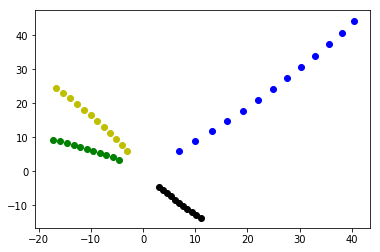

In [150]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_test[:] == foundtrack,0],X_train_df.values[y_test[:] == foundtrack,1],color=cmap[int(foundtrack) % 5])
plt.show()

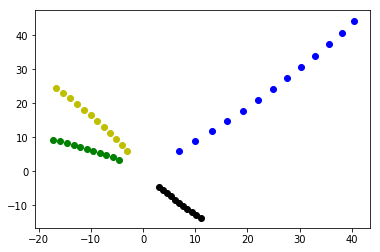

In [151]:
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(X_train_df.values[y_pred[:] == foundtrack,0],X_train_df.values[y_pred[:] == foundtrack,1],color=cmap[int(foundtrack) % 5])
plt.show()

In [152]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [153]:
hits_polar = transform.polar(X_train_df.values)
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.000011])

(-0.0, 1.1e-05)

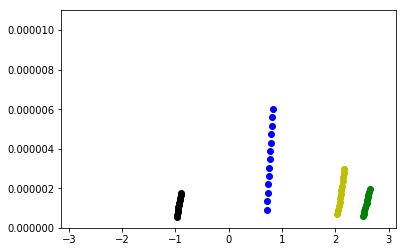

In [154]:
for foundtrack in np.unique(y_test):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_test[:] == foundtrack,1],hits_polar[y_test[:] == foundtrack,0],color=cmap[int(foundtrack) % 5])
plt.show()

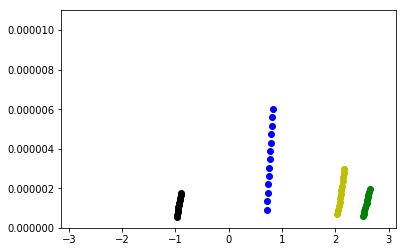

In [155]:
plt.xlim([-np.pi,np.pi])
plt.ylim([-0.,0.000011])
for foundtrack in np.unique(y_pred):
    if foundtrack >= 0:
        plt.scatter(hits_polar[y_pred[:] == foundtrack,1],hits_polar[y_pred[:] == foundtrack,0],color=cmap[int(foundtrack) % 5])
plt.show()

In [149]:
import score_cluster as sc